In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_excel(r"d:\MYSQL\Manovate Da task\Superstore(Fathimunisha).xlsx")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


Number of rows : 9994 ,
Number of columns : 21

COLUMN NAMES & DATA TYPES:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Missing values percentage:

In [35]:
missing_df = df.isnull().mean() * 100
print(missing_df)

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64


Duplicate Record count:

In [36]:
df.duplicated().sum()

np.int64(0)

Outliers in Sales/ Profit:

In [41]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
sales_outliers = df['Sales'][(df['Sales'] < Q1 - 1.5 * IQR) | (df['Sales'] > Q3 + 1.5 * IQR)]

# Count of outliers
sales_outliers_count = len(sales_outliers)
sales_outliers_count

1167

profit outliers

In [42]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
profit_outliers = df['Profit'][(df['Profit'] < Q1 - 1.5 * IQR) | (df['Profit'] > Q3 + 1.5 * IQR)]
profit_outliers_count = len(profit_outliers)
profit_outliers_count

1881

Discount vs Profit (Visualization:)

In [52]:
df[['Discount', 'Profit']].corr()


,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


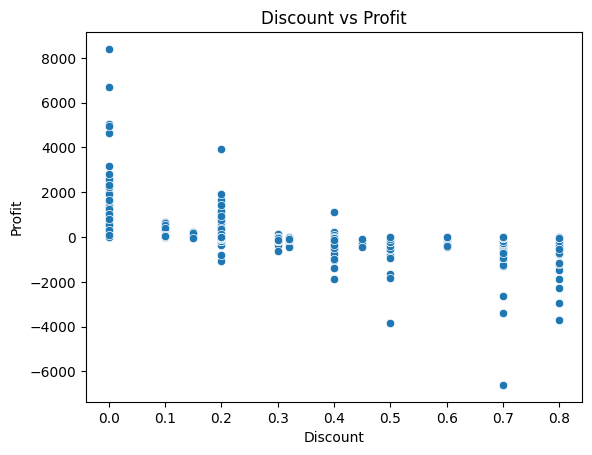

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

Sales vs Quantity:

In [44]:
df[['Sales', 'Quantity']].corr()

,Sales,Quantity
Sales,1.000000,0.200795
Quantity,0.200795,1.000000


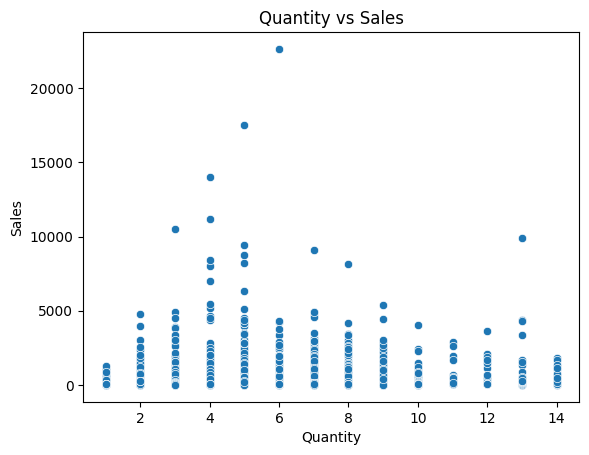

In [46]:
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title('Quantity vs Sales')
plt.show()

Dataset Profiling Summary — Sample – Superstore.csv:

1) Shape:
   - Rows : 9994
   - Columns : 21

2) Column Types:
   - Numeric: Sales, Profit, Discount, Quantity, Postal Code, Row ID
   - Dates: Order Date, Ship Date
   - Categorical: Others

3) Missing Values:
   - Most columns: 0%

4) Duplicate Records:
   - Count: 0

5) Outlier Summary:
   - Sales: 1167 outliers detected
   - Profit: 1881 outliers detected

6) Relationships:
   - Discount vs Profit Correlation: 	
        Discount	   Profit
Discount	1.000000	-0.219487
Profit	-0.219487	1.000000

   - Sales vs Quantity Correlation: 
   	Sales	Quantity
Sales	1.000000	0.200795
Quantity	0.200795	1.000000

